In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4
import datetime as dt 
import matplotlib.dates as mdates
import pandas as pd 
import xarray as xr 
import scipy
import cmocean

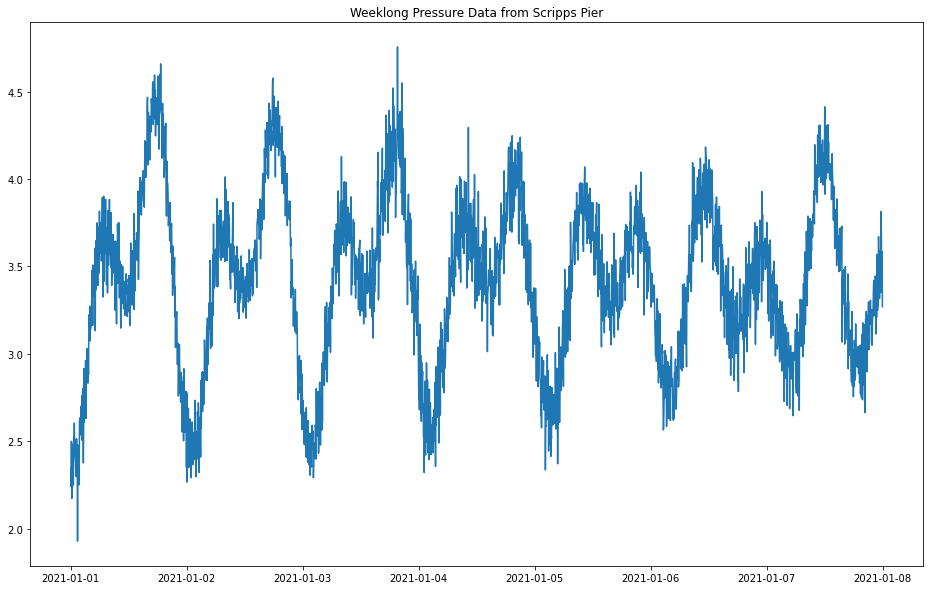

In [32]:
# downloading scripps pier data 

def ind_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


year_string = str(2021)
url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
url = url_base+year_string+'.nc'

# read current file: 
nc = netCDF4.Dataset(url)
# if you want the information printed as you go: print(nc)

# Matthew gave us the time domain of interest


time = nc['time'][:]
temp = nc['temperature'][:]
pressure = nc['pressure'][:]
    
# convert to datetimes based on units of 'seconds since 1970-01-01'
s0 = dt.datetime(1970,1,1)
dates = [s0+dt.timedelta(seconds=float(tt)) for tt in time.data]

weeklong = dates[0]+dt.timedelta(days=7)
idx = ind_nearest(dates,weeklong)

# subsection of the weeklong data 

dates = dates[0:idx]
time = time[0:idx]
temp = temp[0:idx]
pressure = pressure[0:idx]

fig,ax = plt.subplots(figsize=(16,10))
ax.set_title('Weeklong Pressure Data from Scripps Pier')
ax.plot(dates,pressure)

# weeklong timeseries done 
# compute fourier transform 
# inverse FT and get back same timeseries 

# frequency vectors 




In [37]:
print(fft.shape, time.shape, pressure.shape)

(129244,) (2520,) (2520,)


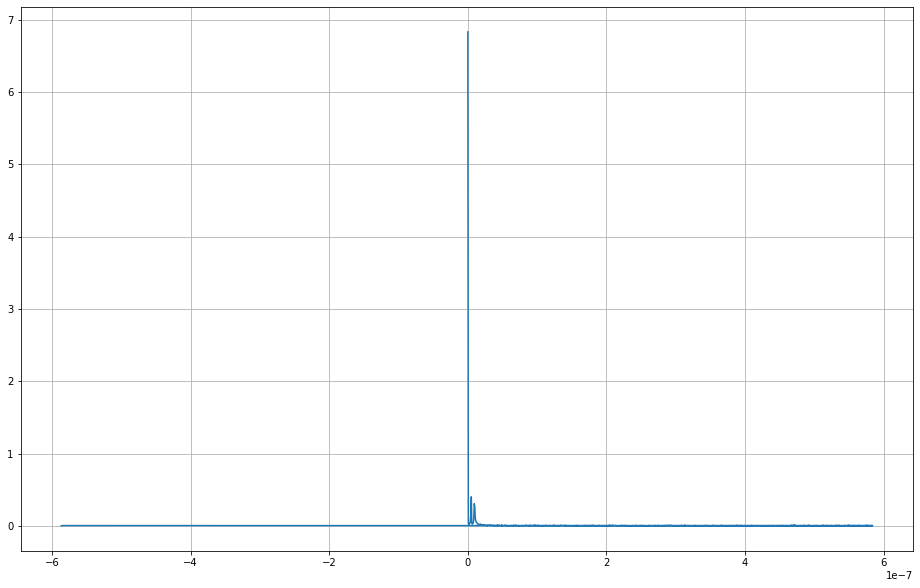

In [39]:
# compute fourier transform 

N = len(time)
fourier = scipy.fft.fft(pressure)
freq = scipy.fft.fftfreq(N,time)[:N//2]

fig,ax = plt.subplots(figsize=(16,10))
ax.plot(freq, 2.0/N * np.abs(fourier[0:N//2]))
ax.grid()
plt.show()


In [19]:
# inverse FT and get back same timeseries 




# frequency vectors 


masked_array(data=[2.344, 2.239, 2.499, ..., 3.436, 3.584, 3.269],
             mask=False,
       fill_value=1e+20,
            dtype=float32)